In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
df=pd.read_csv('C:\\Users\\Dell\\Downloads\\smsspamcollection\\SMSSpamCollection.csv',delimiter='\t',header=None)
df
print(df.count)

<bound method DataFrame.count of          0                                                  1
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham               Will ü b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>


In [4]:
print('Number of spam messages:',df[df[0]=='spam'][0].count())
print('Number of ham messages:',df[df[0]=='ham'][0].count())

Number of spam messages: 747
Number of ham messages: 4825


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score

x_train_raw,x_test_raw,y_train,y_test=train_test_split(df.iloc[:,1],df.iloc[:,0],random_state=50)
vectorizer=TfidfVectorizer()
x_train=vectorizer.fit_transform(x_train_raw)
x_test=vectorizer.transform(x_test_raw)
print(x_train)
classifier=LogisticRegression()
classifier.fit(x_train,y_train)
predictions=classifier.predict(x_test)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


  (0, 4631)	0.27446074607064963
  (0, 4216)	0.2407566357249992
  (0, 1554)	0.48106772294638295
  (0, 5797)	0.38550159876513357
  (0, 6795)	0.5848923338440153
  (0, 2119)	0.3802247523767114
  (1, 6966)	0.4082564064248283
  (1, 3711)	0.17643016940076542
  (1, 4754)	0.17210372950428346
  (1, 6243)	0.34278864073099996
  (1, 6618)	0.10381975528004643
  (1, 3269)	0.23902468710028324
  (1, 3666)	0.4082564064248283
  (1, 3593)	0.14115213404083185
  (1, 2666)	0.3236405467625557
  (1, 3376)	0.188698498383113
  (1, 969)	0.36498456703474097
  (1, 2589)	0.35637442960946986
  (2, 4030)	0.4067058435774583
  (2, 6876)	0.6457205700394337
  (2, 1161)	0.4043124849510667
  (2, 3035)	0.3502986505207927
  (2, 6513)	0.3625707823086436
  (3, 6497)	0.11857375071484248
  (3, 2501)	0.20498931416264934
  :	:
  (4177, 55)	0.3417621873002234
  (4177, 2871)	0.32057378361609845
  (4177, 3126)	0.23644874799618326
  (4177, 328)	0.2651996202917851
  (4177, 4557)	0.27500472916454677
  (4177, 3008)	0.2555095704134179
  (4

In [6]:
print(vectorizer.fit_transform(x_train_raw).todense())
A=vectorizer.fit_transform(x_train_raw).todense()
print(len(A))
print(len(vectorizer.vocabulary_))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
4179
7380


In [7]:
for i,prediction in enumerate(predictions[:5]):
    print("Predictions:%s, Message:%s" %(prediction,x_test_raw[i:i+1]))

Predictions:spam, Message:3409    Do you want a New Nokia 3510i colour phone Del...
Name: 1, dtype: object
Predictions:ham, Message:2103    Audrie lousy autocorrect
Name: 1, dtype: object
Predictions:ham, Message:2665    He remains a bro amongst bros
Name: 1, dtype: object
Predictions:ham, Message:3239    Good. No swimsuit allowed :)
Name: 1, dtype: object
Predictions:spam, Message:1205    WIN a year supply of CDs 4 a store of ur choic...
Name: 1, dtype: object


## Confusion Matrix

In [8]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
y_test=[0,0,0,0,0,1,1,1,1,1]
y_pred=[0,1,0,0,0,0,0,1,1,1]
confusion_matrix=confusion_matrix(y_pred,y_test)
print(confusion_matrix)

[[4 2]
 [1 3]]


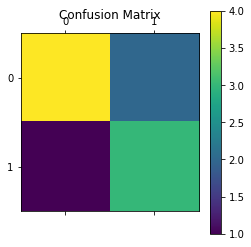

In [9]:
plt.matshow(confusion_matrix)
plt.title('Confusion Matrix')
plt.colorbar()
plt.show()

In [10]:
from sklearn.metrics import accuracy_score
y_pred,y_true=[0,1,1,0],[1,1,1,1]
print("Accuracy :",accuracy_score(y_true,y_pred))

Accuracy : 0.5


In [11]:
import numpy as np
scores=cross_val_score(classifier,x_train,y_train,cv=5)
print(scores)
print(np.mean(scores))

[0.94856459 0.9569378  0.94736842 0.96411483 0.95568862]
0.9545348537375011


In [12]:
print(type(y_train))

<class 'pandas.core.series.Series'>


In [15]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
y_train=lb.fit_transform(y_train)
print(y_train)
classifier.fit(x_train,y_train)
precisions=cross_val_score(classifier,x_train,y_train,cv=5,scoring='precision')
print('Precision :',np.mean(precisions),precisions)

[[0]
 [0]
 [0]
 ...
 [0]
 [1]
 [0]]


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwar

Precision : 0.9923220023676645 [0.98630137 1.         1.         1.         0.97530864]


In [18]:
RECALL=cross_val_score(classifier,x_train,y_train,cv=5,scoring='recall')
print('RECALL :',np.mean(RECALL),RECALL)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwar

RECALL : 0.6723874904652938 [0.63157895 0.68421053 0.61403509 0.73913043 0.69298246]


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [17]:
ACC=cross_val_score(classifier,x_train,y_train,cv=5,scoring='accuracy')
print('accuracy :',np.mean(ACC),ACC)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwar

accuracy : 0.9545348537375011 [0.94856459 0.9569378  0.94736842 0.96411483 0.95568862]


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [19]:
F1=cross_val_score(classifier,x_train,y_train,cv=5,scoring='f1')
print('F1 :',np.mean(F1),F1)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwar

F1 : 0.8007358902819262 [0.77005348 0.8125     0.76086957 0.85       0.81025641]


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
